# Introduction to Pytorch for NLP1

This notebook is meant to give a short introduction to Pytorch basics.

**You do not have to hand in this tutorial.** It is just to help you get started with the projects.

We assume that you have pytorch installed with Python 3. See http://www.pytorch.org for instructions on how to install it.

First, let's check that we can import torch:

In [1]:
%matplotlib inline
import torch

### Random Seed

We can set a seed so that we get the same random values each time we re-run the notebook.
We will use seed [42](https://goo.gl/S3wrAV) here. 

In [2]:
torch.manual_seed(42)

### Tensors

Tensors are the Torch equivalent of **Numpy arrays**, but crucially, they can also be used on a GPU (Video card). This can make your calculations a lot faster.

Since they are so similar, you can actually **convert** most tensors to Numpy arrays (and back), but we won't need to do that so often.

Working with PyTorch, we will need lots of tensors of various shapes.
For example, if we want to transform an input vector $\mathbf{x}$, we will need a weight matrix $W$.

**Note:** "Tensor" is a general name. A 1-D tensor is also called a **vector**, a 2-D tensor a **matrix**.



In [3]:
# create uninitialized 3-D tensor (values can be anything that is in memory!)
x = torch.Tensor(2, 3, 3)
print(x)


(0 ,.,.) = 
  0.0000e+00  2.0000e+00  0.0000e+00
  2.0000e+00  7.0065e-45  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00

(1 ,.,.) = 
  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  2.7604e+20  5.2392e+16
 -3.7035e+19 -2.1600e-33  2.0005e+00
[torch.FloatTensor of size 2x3x3]



In [4]:
# a randomly initialized 2-D tensor (a matrix)
x = torch.rand(4, 3)
print(x)


 0.3745  0.7965  0.9507
 0.1834  0.7320  0.7797
 0.5987  0.5969  0.1560
 0.4458  0.1560  0.1000
[torch.FloatTensor of size 4x3]



In [5]:
# how to get its size
print(x.size())

torch.Size([4, 3])


In [6]:
# or if you know there are 2 dimensions:
time, dim = x.size()
print(time, dim)

4 3


### Operations

#### Adding

In [7]:
# You can add tensors in many ways. 
# The easiest is to simply use a python + operator:
y = torch.rand(4, 3)
print(x + y)

# But you can also use torch.add:
print(torch.add(x, y))

# Provide an output Tensor and save the result there:
result = torch.Tensor(4, 3)
torch.add(x, y, out=result)
print(result)

# Or add in-place (this changes y!)
# Note: Any operation that mutates a tensor in-place is post-fixed with an "_", like "add_" here.
y.add_(x)
print(y)


 0.4326  1.2558  1.8169
 0.5171  1.3331  0.9226
 1.3067  1.2477  0.1766
 0.5022  1.1259  0.8220
[torch.FloatTensor of size 4x3]


 0.4326  1.2558  1.8169
 0.5171  1.3331  0.9226
 1.3067  1.2477  0.1766
 0.5022  1.1259  0.8220
[torch.FloatTensor of size 4x3]


 0.4326  1.2558  1.8169
 0.5171  1.3331  0.9226
 1.3067  1.2477  0.1766
 0.5022  1.1259  0.8220
[torch.FloatTensor of size 4x3]


 0.4326  1.2558  1.8169
 0.5171  1.3331  0.9226
 1.3067  1.2477  0.1766
 0.5022  1.1259  0.8220
[torch.FloatTensor of size 4x3]



#### Matrix multiplication

Matrix multiplications are essential for Neural networks. Quite often, we have an input vector $\mathbf{x}$, and then we want to learn weights $W$ that transform that input to some output that we want. 

We will now walk you through matrix multiplication in PyTorch.

In [8]:
# Let's create a vector x with values 0..5
# We can use the arange function for that:
x = torch.arange(0, 6)
print(x)
print(x.shape)


 0
 1
 2
 3
 4
 5
[torch.FloatTensor of size 6]

torch.Size([6])


In [9]:
# Now, we will reshape x to have shape 2x3
# That is, it will become a matrix!
# The values will be the same, we will just look at them differently.
x = x.view((2, 3))
print(x)
print(x.shape)


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

torch.Size([2, 3])


In [10]:
# Now, let's create a square matrix W:
W = torch.arange(0, 9).view((3, 3))
print(W)


 0  1  2
 3  4  5
 6  7  8
[torch.FloatTensor of size 3x3]



In [11]:
# Now we can perform matrix multiplication, since we have 2x3 and 3x3 matrices!
# Verify if you can do this multiplication by hand, too!
# If you need some help, you can check here: https://www.mathsisfun.com/algebra/matrix-multiplying.html
h = torch.matmul(x, W)
print(h)


 15  18  21
 42  54  66
[torch.FloatTensor of size 2x3]



#### More operations
In case you want to do something different from addition or matrix-multiplying (and that is quite likely!), you can read here about all of Torch's operations: http://pytorch.org/docs/master/torch.html 


### Indexing
It is quite common that we need to select a part of a tensor. Indexing works just like in Numpy!

In [12]:
print(result[:, 1])    # second column
print(result[0])       # first row
print(result[:2, -1])  # first two rows, last column
print(result[1:3, :])  # middle two rows


 1.2558
 1.3331
 1.2477
 1.1259
[torch.FloatTensor of size 4]


 0.4326
 1.2558
 1.8169
[torch.FloatTensor of size 3]


 1.8169
 0.9226
[torch.FloatTensor of size 2]


 0.5171  1.3331  0.9226
 1.3067  1.2477  0.1766
[torch.FloatTensor of size 2x3]



## Automatic differentiation with Autograd

One of the main reasons for using PyTorch is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for using Neural networks, and they are just fancy functions! If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our Neural Network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us!

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a Neural Net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $W$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want. 

### Variable

In order to get the autograd functionality, we will need to wrap all our Tensors in Variables. You can import the Variable class like this:

```python
from torch.autograd import Variable
```

Converting a Tensor to a Variable is easy:

```python
# example
x = torch.ones(2, 2)
x = Variable(x, requires_grad=True)
```

You can still access the underlying Tensor using `.data`:

```python
print(x.data)
```

Let's try it out!

### Example

We're going to define a function $$y_i = (x_i + 2)^2 + 3$$
And as our final output $o$ we take the mean over all values $y_i$, so we get a single output value:

$$o = \frac{1}{|y|} \sum_i y_i$$

As our input $\mathbf{x}$ we'll use a vector with 3 values: $[1, 1, 1]$.

In [13]:
from torch.autograd import Variable

# create an input vector x
x = Variable(torch.ones(3), requires_grad=True)
print(x)

Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]



In [14]:
# Now we define our function
# Note that, even though x is a vector, we can still add a single value to it.
# PyTorch will just add that value to each element of the vector.
y = (x + 2)**2 + 3
print(y)

Variable containing:
 12
 12
 12
[torch.FloatTensor of size 3]



In [15]:
# y has a grad_fn since it was created by an operation
# this grad_fn will be used by PyTorch for obtaining the gradient
print(y.grad_fn)

In [16]:
# Our final output o is the mean
o = y.mean()
print(o)

Variable containing:
 12
[torch.FloatTensor of size 1]



In [17]:
# now we can take the gradients by calling o.backward()
# this will populate x.grad
o.backward()

`x.grad` will now contain the gradient $\partial o/ \partial x$, and this will say how a change in $x$ will affect output $o$:

In [18]:
print(x.grad)

Variable containing:
 2
 2
 2
[torch.FloatTensor of size 3]



#### Verifying the gradient by hand

You should now see a gradient of `[2, 2, 2]`.

We can verify this by hand!

Our output $\mathbf{o}$ is the mean of $\mathbf{y}$:
$$o = \frac{1}{3}\sum_i y_i$$

And $\mathbf{y}$ consists of elements $y_i$:

$$y_i = (x_i+2)^2 + 3$$ 

We know that $y_i = 12$, given that $x_i = 1$ (for each $i$):
$$y_i\bigr\rvert_{x_i=1} = 12$$

Therefore,
$$\frac{\partial o}{\partial x_i} = \frac{\partial o}{\partial y_i}\frac{\partial y_i}{\partial x_i} = \underbrace{\frac{1}{3}}_{\frac{\partial o}{\partial y_i}} \underbrace{2 (x_i+2)}_{\frac{\partial y_i}{\partial x_i}} = \frac{2}{3} (x_i+2)$$

hence
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{2}{3} * 3 = 2$$

## NN module

Now if we want to build a big Neural Net, we could specify all our parameters (weight matrices, bias vectors) using `Variables`, ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building Neural Nets more convenient. 

Let's define a very simple Neural Net to show you how it works. The network performs a **logistic regression**, i.e. it calculates:
$$ y = \sigma( W \mathbf{x} + b )$$

You have already seen how to calculate $W \mathbf{x} + b$; it's a matrix multiplication with an added bias. The function $\sigma$ might be new: it is the sigmoid function, and it is defined as:
$$ \sigma(x) = \frac{1}{1+ \exp(-x)} $$

The $\exp$ makes sure all values are positive, while the rest scales them between 0 and 1. 
You can see the function below:

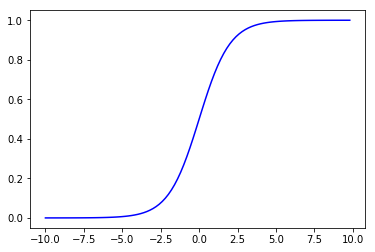

In [19]:
import numpy as np
import matplotlib.pyplot as plt
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.arange(-10., 10., 0.2)
plt.plot(x, sigmoid(x), 'b', label='sigmoid')

In NLP, we are often doing **classification**, rather than regression (predicting a value). So, even though the name can be misleading, logistic regression is a **classifier**: we have two output classes 0 and 1.

To get the 2 classes, we use the sigmoid function $\sigma$, so that the values coming out of our NN are between 0 and 1. You can see that in the picture above.



In [20]:
import torch.nn as nn
import torch.nn.functional as F


class ExampleNN(nn.Module):

    def __init__(self):
        super(ExampleNN, self).__init__()
        
        # an affine operation: y = Wx + b
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        x = self.linear(x)
        x = F.sigmoid(x)  # output values are squashed between 0 and 1
        return x

net = ExampleNN()
print(net)

ExampleNN (
  (linear): Linear (3 -> 1)
)


Now, this is a very simple Neural Network! Actually, it is so simple maybe we should not call it a Neural network. But let's do so anyway.

This is what you should know: 

- when defining your Neural Net, you create a class that *inherits* from `nn.Module`. 
- We called our Neural Net `ExampleNN`.
- Parameters are defined within the `__init__` method. Here we defined a single **linear** layer. The parameters for that layer (a weight matrix $W$ and a bias term $b$) are added **automatically** to our parameter list.
- We define our computation in the `forward` function. In this case, we apply the linear layer to our input $\mathbf{x}$ and then a sigmoid function.

Let's check if our parameters are indeed as we expect them to be:

In [21]:
params = list(net.parameters())

for p in params:
    print(p)


Parameter containing:
 0.3839  0.5064 -0.3322
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.5765
[torch.FloatTensor of size 1]



You can see that:

- the first parameter is our weight matrix $W$, which is shaped $[1, 3]$.
- the second parameter is the bias term $b$, which is a scalar (a single value), since the weight matrix transforms our input $\mathbf{x}$ (with 3 elements) into a single scalar.

Observe that these parameters have been randomly initialized.

Now that we have our NN, we can feed it an input and see what comes out.
The input has to be a `Variable`. 

In [22]:
x = Variable(torch.randn(3))
print("input:", x)
out = net(x)
print("output:", out)

input: Variable containing:
 1.2944
 2.8346
 0.5633
[torch.FloatTensor of size 3]

output: Variable containing:
 0.7629
[torch.FloatTensor of size 1]



#### Loss 
Now we would like to use the `autograd` functionality to get gradients, but we first need a loss!
The loss will tell us how well our network is doing.

We're going to say that, for our input example, the **target** value is `0`. 
The target is what we wanted our network to **predict** for the input that we gave.

As our **loss** (or "criterion") we'll use the MSE, Mean Squared Error:

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (o_i - t_i)^2 $$

I.e. it is the average, over elements $i$, of the squared difference of output $o_i$ with target $t_i$.
Since we have a single output value here, our loss is simply $(o - t)^2$.

Let's calculate our loss:

In [23]:
out = net(x)
target = Variable(torch.zeros(1))  # a dummy target (0.)
criterion = nn.MSELoss()  # this is our criterion
loss = criterion(out, target)
print("output:", out)
print("loss:", loss)

output: Variable containing:
 0.7629
[torch.FloatTensor of size 1]

loss: Variable containing:
 0.5820
[torch.FloatTensor of size 1]



Now we'll ask PyTorch to **update** the weights (parameters) of our neural network so that our next prediction is closer to that target.

We first need to zero-out all gradient tensors. `net.zero_grad()` will do this for all parameters. It will set `p.grad` to zeros for each parameter $p$.

In [24]:
net.zero_grad()  # reset gradients
loss.backward()  # compute gradients

# update weights
learning_rate = 0.5
for f in net.parameters():
    # for each parameter, take a small step in the opposite dir of the gradient
    # sub_ substracts in-place
    f.data.sub_(f.grad.data * learning_rate)


Now, if we check the output for the same input vector $\mathbf{x}$, the output should be closer to the target:

In [25]:
new_out = net(x)
new_loss = criterion(new_out, target)

print("target:", target)
print("out:", out)
print("new out (should be closer to target):", new_out)

print("\nloss:", loss)
print("new loss (should be lower):", new_loss)

target: Variable containing:
 0
[torch.FloatTensor of size 1]

out: Variable containing:
 0.7629
[torch.FloatTensor of size 1]

new out (should be closer to target): Variable containing:
 0.4127
[torch.FloatTensor of size 1]


loss: Variable containing:
 0.5820
[torch.FloatTensor of size 1]

new loss (should be lower): Variable containing:
 0.1703
[torch.FloatTensor of size 1]



## Bag of Words (BOW) classifier

Congratulations, that's the basics! 


We will now take a look at the BOW model that we showed in the beginning. 
Given a sentence (a sequence of tokens), we will predict the **sentiment** of that sentence (0 - very negative, ..., 4 - very positive). 

We associate a learned vector $\mathbf{w}$ (size $5$) with every token. 
To determine the sentiment, we will add up the word vectors, also called the **embeddings**, of each token in the sentence. We also add a **bias vector**, which is also a learned vector of size 5.

You can now take a look at `bow-simple.py`.  You will see that the bias vector is missing.

### Exercises

1. Always take a look at the **data** first! Open `data/classes/test.txt` in your favorite editor. On Linux/OS X, use `less filename` from the Terminal to open big files without filling your memory.

2. Take a look at how the data is *read in* and how the *dictionaries* are created. Make sure you understand how this works. The dictionaries convert words to integers, and this will be very useful when we want to sum the embeddings of certain words in a sentence.

3. Find the location where the Variable is defined that holds the weights for each token. On a separate line, add another Variable that just holds the **bias** (a vector of size `ntags`). Like the weights, this vector should be initialized randomly.

4. Find the `calc_scores` function and make sure you understand what it does. Then, add the bias parameter to the `score`, before it is returned.

5. Make sure the bias parameter is also updated after the gradients are calculated. The bias term is updated similarly to how the weights are updated, after `output.backward()` is called.

6. Finally, don't forget to zero-out the gradient tensor of the bias parameters after updating. Again, this is similar to the code that zeros out the gradients for the weights.

Now, play a bit with your BOW classifier. Does it work well?


## BOW using torch.nn

In the `bow-simple.py` code we did a lot of stuff manually; the updates for example.
Now take a look at `bow-nn.py`. In this code we use the `torch.nn` package to use some higher-level functions.

### Exercises

1. The bias term is missing again; please add it back. This time, you will have to define it in the `__init__` method of the BOW model. Hint: you will need to use `nn.Parameter`.

2. In the `forward` function of the model, make sure to sum the bias that you defined in the previous step.

3. Now take a look at how the weights are updated. You don't have to change this code, since the optimizer automatically finds all the model parameters (w and b). This code uses the `torch.optim` package to do the same as what we did manually before.

Make sure that you can run this code, and verify that it gives similar results to the manual code.


## Continious BOW (CBOW) classifier

Now that you've looked at the BOW models, it is time to take a look at `cbow.py`.
The difference with BOW is that we can now assign more parameters per token, and this allows us to capture more fine-grained aspects of the tokens. Before, we could only associate how much a token was associated with each class.
But now we can use as many dimensions as we like. One dimension could be if the word is an adjective, or if it describes an object. We will now use a separate weight matrix to transform the sum of word representations into the number of classes that we have:
$$o = W \mathbf{x} + b$$
where $\mathbf{x}$ is the sum of the word embeddings.

### Exercises

1. In the `__init__` method of the model, add a `nn.Linear` layer to transform a vector of `embedding_dim` into a vector of size `ntags`. Note that the linear layer "secretly" defines paramters $W$ and $b$ for us.

2. In the `forward` method, apply the `bow` (the sum of word embeddings) to the linear layer, like this: `logits = self.linear(bow)`

3. Now take a look at the training loop. Did you notice that `lookup_tensor` takes as input a list of sentences? Why is this?

You can now play around with this code. You can e.g. try different learning rates, and adding more layers. 

## That's it! 

We will release the solutions next week.